### 1 数据处理：对流动性指标（成交量、换手率等）进行平滑处理，使用5交易日滚动值求和

#### 成交量

In [65]:
import pandas as pd
trading_vol = pd.read_excel('指标.xlsx',sheet_name = '成交量',index_col = 0)
trading_vol['001004成交量（单位：亿股）_平滑'] = trading_vol.rolling(5,min_periods = 1).mean()
trading_vol

,001004成交量（单位：亿股）,001004成交量（单位：亿股）_平滑
2012-01-04,80.739204,80.739204
2012-01-05,94.370571,87.554887
2012-01-06,81.982027,85.697267
2012-01-09,120.405369,94.374293
2012-01-10,177.546296,111.008693
...,...,...
2020-12-25,630.933209,652.047404
2020-12-28,687.610883,664.441823
2020-12-29,681.772464,659.404614
2020-12-30,640.686140,654.358842


#### 换手率

In [66]:
turnover = pd.read_excel('指标.xlsx',sheet_name = '换手率',index_col = 0)
turnover['001004换手率_平滑'] = turnover.rolling(5,min_periods = 1).mean()
turnover

,001004换手率,001004换手率_平滑
2012-01-04,0.375522,0.375522
2012-01-05,0.439312,0.407417
2012-01-06,0.418584,0.411139
2012-01-09,0.560958,0.448594
2012-01-10,0.825322,0.523940
...,...,...
2020-12-25,1.135119,1.173350
2020-12-28,1.238157,1.195775
2020-12-29,1.221972,1.185581
2020-12-30,1.148230,1.175658


### 2 对所选情绪代理指标进行筛选，选择数据齐全 & 与市场指数相关性较高的代理变量（计算相关系数）

#### 指标筛选: 
#### 新股上市首日收益率空值太多，且转化为0无实际意义，故不采用
#### 以下10个指标经过处理，均可与HS300计算相关系数

#### 融资余额trading_balance、融券余额sec_lending_balance

In [55]:
trading_balance = pd.read_excel('指标.xlsx',sheet_name = '融资融券',index_col = 0).iloc[:,[0]]
sec_lending_balance = pd.read_excel('指标.xlsx',sheet_name = '融资融券',index_col = 0).iloc[:,[1]]
print('')

In [56]:
trading_balance

,001004融资余额（合计，单位：亿元）
2012-01-04,363.875206
2012-01-05,360.172398
2012-01-06,360.680748
2012-01-09,357.337918
2012-01-10,355.388199
...,...
2020-12-25,13102.566768
2020-12-28,13136.458941
2020-12-29,13080.194058
2020-12-30,13121.159255


In [57]:
sec_lending_balance

,001004融券余额（合计，单位：亿元）
2012-01-04,6.826666
2012-01-05,6.868437
2012-01-06,6.587964
2012-01-09,7.425210
2012-01-10,8.156394
...,...
2020-12-25,1088.945666
2020-12-28,1096.791430
2020-12-29,1097.484152
2020-12-30,1133.013233


#### 成交量trading_vol

In [67]:
trading_vol = trading_vol.iloc[:,[1]]
trading_vol

,001004成交量（单位：亿股）_平滑
2012-01-04,80.739204
2012-01-05,87.554887
2012-01-06,85.697267
2012-01-09,94.374293
2012-01-10,111.008693
...,...
2020-12-25,652.047404
2020-12-28,664.441823
2020-12-29,659.404614
2020-12-30,654.358842


#### 换手率turnover

In [68]:
turnover = turnover.iloc[:,[1]]
turnover

,001004换手率_平滑
2012-01-04,0.375522
2012-01-05,0.407417
2012-01-06,0.411139
2012-01-09,0.448594
2012-01-10,0.523940
...,...
2020-12-25,1.173350
2020-12-28,1.195775
2020-12-29,1.185581
2020-12-30,1.175658


#### 市盈率PE、市净率PB

In [60]:
PE = pd.read_excel('指标.xlsx',sheet_name = '市盈率',index_col = 0)
PB = pd.read_excel('指标.xlsx',sheet_name = '市净率',index_col = 0)
print('')

In [61]:
PE

,001004市盈率
2012-01-04,12.789588
2012-01-05,12.606586
2012-01-06,12.695395
2012-01-09,13.078578
2012-01-10,13.455131
...,...
2020-12-25,21.812183
2020-12-28,21.800897
2020-12-29,21.680826
2020-12-30,21.943651


In [62]:
PB

,001004市净率
2012-01-04,1.809715
2012-01-05,1.783618
2012-01-06,1.796171
2012-01-09,1.850566
2012-01-10,1.903938
...,...
2020-12-25,1.881647
2020-12-28,1.880798
2020-12-29,1.870468
2020-12-30,1.893209


#### 沪深300指数HS300

In [63]:
HS300 = pd.read_excel('指标.xlsx',sheet_name = '沪深300',index_col = 0)
HS300

,000300.SH
2012-01-04,2298.7530
2012-01-05,2276.3850
2012-01-06,2290.6010
2012-01-09,2368.5700
2012-01-10,2447.3490
...,...
2020-12-25,5042.0137
2020-12-28,5064.4147
2020-12-29,5042.9361
2020-12-30,5113.7105


#### 活力指数active_2012_2020
#### [收盘价 > MA20]的个股数量 / 4375

In [9]:
close_2012 = pd.read_excel('收盘价.xlsx',sheet_name = '2012',index_col = None)
close_2012

,Date,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,...,688690.SH,688696.SH,688698.SH,688699.SH,688700.SH,688777.SH,688788.SH,688819.SH,688981.SH,689009.SH
0,2012-01-04,4.863459,5.399671,7.91,3.86,2.352632,4.605699,0.748076,4.414269,3.657806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-05,4.937245,5.340739,7.33,3.86,2.323658,4.372415,0.717565,4.169517,3.657806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-06,4.924413,5.274440,7.36,3.86,2.317864,4.245775,0.722085,4.418639,3.657806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-09,5.062361,5.458604,7.70,3.86,2.381605,4.412407,0.758246,4.860066,3.657806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-10,5.062361,5.547002,8.16,3.86,2.468525,4.519051,0.796667,5.065483,3.657806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-12-25,4.980527,7.562857,7.94,2.89,3.638728,9.324708,1.176355,3.728090,4.675392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,2012-12-26,4.967599,7.562857,8.04,2.93,3.669051,9.331373,1.178615,3.758684,4.675392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2012-12-27,5.003151,7.562857,8.07,2.89,3.570502,9.371365,1.187655,3.684385,4.675392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,2012-12-28,5.041935,7.562857,8.19,2.94,3.684212,9.664637,1.221556,3.776167,4.675392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
close_2012 = close_2012.melt(id_vars='Date',var_name = 'code',value_name='close price')
close_2012

,Date,code,close price
0,2012-01-04,000001.SZ,4.863459
1,2012-01-05,000001.SZ,4.937245
2,2012-01-06,000001.SZ,4.924413
3,2012-01-09,000001.SZ,5.062361
4,2012-01-10,000001.SZ,5.062361
...,...,...,...
1063120,2012-12-25,689009.SH,NaN
1063121,2012-12-26,689009.SH,NaN
1063122,2012-12-27,689009.SH,NaN
1063123,2012-12-28,689009.SH,NaN


In [19]:
MA20_2012 = pd.read_excel('MA20.xlsx',sheet_name = '2012',index_col = None)
MA20_2012

,Date,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,...,688690.SH,688696.SH,688698.SH,688699.SH,688700.SH,688777.SH,688788.SH,688819.SH,688981.SH,689009.SH
0,2012-01-04,4.978790,5.437977,9.1335,4.1230,2.494021,4.760000,0.897239,5.815034,3.587926,...,0,0,0,0,0,0,0,0,0,0
1,2012-01-05,4.969807,5.432452,8.9555,4.1230,2.476927,4.698013,0.881193,5.681295,3.587926,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-06,4.958579,5.422876,8.7845,4.1230,2.458384,4.628694,0.865203,5.561979,3.587926,...,0,0,0,0,0,0,0,0,0,0
3,2012-01-09,4.956013,5.419929,8.6315,4.1230,2.443897,4.581704,0.851812,5.455774,3.587926,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-10,4.956013,5.419561,8.5155,4.1230,2.434336,4.538047,0.840229,5.363118,3.587926,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2012-12-25,4.568122,6.890271,7.4980,2.7345,3.210041,8.603860,1.146240,3.527700,3.960707,...,0,0,0,0,0,0,0,0,0,0
239,2012-12-26,4.604967,6.890271,7.5320,2.7575,3.251355,8.661181,1.148839,3.544308,3.960707,...,0,0,0,0,0,0,0,0,0,0
240,2012-12-27,4.649246,6.890271,7.5765,2.7790,3.288122,8.731166,1.153359,3.562446,3.960707,...,0,0,0,0,0,0,0,0,0,0
241,2012-12-28,4.694494,6.890271,7.6240,2.8000,3.326025,8.793486,1.158953,3.582988,3.960707,...,0,0,0,0,0,0,0,0,0,0


In [20]:
MA20_2012 = MA20_2012.melt(id_vars='Date',var_name = 'code',value_name='MA20')
MA20_2012

,Date,code,MA20
0,2012-01-04,000001.SZ,4.978790
1,2012-01-05,000001.SZ,4.969807
2,2012-01-06,000001.SZ,4.958579
3,2012-01-09,000001.SZ,4.956013
4,2012-01-10,000001.SZ,4.956013
...,...,...,...
1063120,2012-12-25,689009.SH,0.000000
1063121,2012-12-26,689009.SH,0.000000
1063122,2012-12-27,689009.SH,0.000000
1063123,2012-12-28,689009.SH,0.000000


In [21]:
test = pd.merge(close_2012,MA20_2012,on = ['Date','code'])
test

,Date,code,close price,MA20
0,2012-01-04,000001.SZ,4.863459,4.978790
1,2012-01-05,000001.SZ,4.937245,4.969807
2,2012-01-06,000001.SZ,4.924413,4.958579
3,2012-01-09,000001.SZ,5.062361,4.956013
4,2012-01-10,000001.SZ,5.062361,4.956013
...,...,...,...,...
1063120,2012-12-25,689009.SH,NaN,0.000000
1063121,2012-12-26,689009.SH,NaN,0.000000
1063122,2012-12-27,689009.SH,NaN,0.000000
1063123,2012-12-28,689009.SH,NaN,0.000000


In [24]:
test1 = test[test['close price'] > test['MA20']]
test1

,Date,code,close price,MA20
3,2012-01-09,000001.SZ,5.062361,4.956013
4,2012-01-10,000001.SZ,5.062361,4.956013
5,2012-01-11,000001.SZ,5.062361,4.956013
6,2012-01-12,000001.SZ,5.062361,4.956013
7,2012-01-13,000001.SZ,5.062361,4.956013
...,...,...,...,...
965920,2012-12-25,603993.SH,2.446491,2.160625
965921,2012-12-26,603993.SH,2.523035,2.188299
965922,2012-12-27,603993.SH,2.422938,2.214059
965923,2012-12-28,603993.SH,2.455681,2.240279


In [25]:
Date_2012 = pd.read_excel('Dates.xlsx',sheet_name = '2012').iloc[:,[0]]
Date_2012

,Date
0,2012-01-04
1,2012-01-05
2,2012-01-06
3,2012-01-09
4,2012-01-10
...,...
238,2012-12-25
239,2012-12-26
240,2012-12-27
241,2012-12-28


In [49]:
active_2012 = []
for i in range(len(Date_2012)):
    Date = str(Date_2012.iloc[i]).replace(' ','')[4:14]
    active_daily = len(test1[test1['Date'] == Date]) / 4375
    active_2012 += [active_daily]
Date_2012['active index'] = pd.DataFrame(active_2012)
Date_2012

,Date,active index
0,2012-01-04,0.048000
1,2012-01-05,0.035429
2,2012-01-06,0.043886
3,2012-01-09,0.104686
4,2012-01-10,0.241829
...,...,...
238,2012-12-25,0.541029
239,2012-12-26,0.542629
240,2012-12-27,0.542171
241,2012-12-28,0.541943


In [47]:
#Date1 = str(Date_2012.iloc[0]).replace(' ','')[4:14]
#Date1

'2012-01-04'

In [48]:
#len(test1[test1['Date'] == Date1])

210

##### _    将以上代码整理为循环语句，得到2012年 - 2020年每日活力指数

In [47]:
def active_index(year):
    '''get daily active index in one year'''
    year = str(year)
    close_year = pd.read_excel('收盘价.xlsx',sheet_name = year,index_col = None)
    close_year = close_year.melt(id_vars='Date',var_name = 'code',value_name='close price')
    MA20_year = pd.read_excel('MA20.xlsx',sheet_name = year,index_col = None)
    MA20_year = MA20_year.melt(id_vars='Date',var_name = 'code',value_name='MA20')
    test = pd.merge(close_year,MA20_year,on = ['Date','code'])
    test1 = test[test['close price'] > test['MA20']]
    Date_year = pd.read_excel('Dates.xlsx',sheet_name = year).iloc[:,[0]]
    active_year = []
    for i in range(len(Date_year)):
        Date = str(Date_year.iloc[i]).replace(' ','')[4:14]
        active_daily = len(test1[test1['Date'] == Date]) / 4375
        active_year += [active_daily]
    Date_year['active index'] = pd.DataFrame(active_year)
    return Date_year

active_2012 = active_index(2012)
active_2013 = active_index(2013)
active_2014 = active_index(2014)
active_2015 = active_index(2015)
active_2016 = active_index(2016)
active_2017 = active_index(2017)
active_2018 = active_index(2018)
active_2019 = active_index(2019)
active_2020 = active_index(2020)
active_2012_2020 = pd.concat([active_2012,active_2013,active_2014,active_2015,active_2016,active_2017,active_2018,active_2019,active_2020])
active_2012_2020 = active_2012_2020.set_index('Date')
active_2012_2020

,active index
Date,
2012-01-04,0.048000
2012-01-05,0.035429
2012-01-06,0.043886
2012-01-09,0.104686
2012-01-10,0.241829
...,...
2020-12-25,0.249829
2020-12-28,0.248000
2020-12-29,0.215543


#### 超跌个股数量oversold_2012_2020
#### [最高价 < MA10] 的个股数量

In [45]:
#检查数据类型,发现需要修改'最高价.xlsx'的Date至datetime64[ns]类型，需要修改'MA10.xlsx'的MA10至float64类型（在以下自定义函数修改）
#检查数据长度，发现数据长度不一致，需要在pd.merge额外设置how = 'inner'（在以下自定义函数修改）
year = '2012'
high_year = pd.read_excel('最高价.xlsx',sheet_name = year,index_col = None)
high_year = high_year.melt(id_vars='Date',var_name = 'code',value_name='highest price')
MA10_year = pd.read_excel('MA10.xlsx',sheet_name = year,index_col = None)
MA10_year = MA10_year.melt(id_vars='Date',var_name = 'code',value_name='MA10')
print(high_year.info())
print(MA10_year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039797 entries, 0 to 1039796
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Date           1039797 non-null  datetime64[ns]
 1   code           1039797 non-null  object        
 2   highest price  573081 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051218 entries, 0 to 1051217
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1051218 non-null  datetime64[ns]
 1   code    1051218 non-null  object        
 2   MA10    1051218 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 24.1+ MB
None


In [48]:
def oversold(year):
    '''get daily num of oversold shares in one year'''
    year = str(year)
    high_year = pd.read_excel('最高价.xlsx',sheet_name = year,index_col = None)
    # 修改'最高价.xlsx'的Date至datetime64[ns]类型
    high_year['Date'] = pd.to_datetime(high_year['Date'])
    high_year = high_year.melt(id_vars='Date',var_name = 'code',value_name='highest price')
    MA10_year = pd.read_excel('MA10.xlsx',sheet_name = year,index_col = None)
    MA10_year = MA10_year.melt(id_vars='Date',var_name = 'code',value_name='MA10')
    # 修改'MA10.xlsx'的MA10至float64类型
    MA10_year['MA10'] = pd.to_numeric(MA10_year['MA10'],errors='coerce')
    # 数据长度不同，取交集
    test = pd.merge(high_year,MA10_year,how = 'inner',on = ['Date','code'])
    test1 = test[test['highest price'] < test['MA10']]
    Date_year = pd.read_excel('Dates.xlsx',sheet_name = year).iloc[:,[0]]
    oversold_year = []
    for i in range(len(Date_year)):
        Date = str(Date_year.iloc[i]).replace(' ','')[4:14]
        oversold_daily = len(test1[test1['Date'] == Date])
        oversold_year += [oversold_daily]
    Date_year['oversold'] = pd.DataFrame(oversold_year)
    return Date_year

oversold_2012 = oversold(2012)
oversold_2013 = oversold(2013)
oversold_2014 = oversold(2014)
oversold_2015 = oversold(2015)
oversold_2016 = oversold(2016)
oversold_2017 = oversold(2017)
oversold_2018 = oversold(2018)
oversold_2019 = oversold(2019)
oversold_2020 = oversold(2020)
oversold_2012_2020 = pd.concat([oversold_2012,oversold_2013,oversold_2014,oversold_2015,oversold_2016,oversold_2017,oversold_2018,oversold_2019,oversold_2020])
oversold_2012_2020 = oversold_2012_2020.set_index('Date')
oversold_2012_2020

,oversold
Date,
2012-01-04,805
2012-01-05,1564
2012-01-06,1789
2012-01-09,1068
2012-01-10,276
...,...
2020-12-25,2235
2020-12-28,2070
2020-12-29,1968


#### 成交额trading_amt

In [1]:
import pandas as pd
trading_amt = pd.read_excel('指标.xlsx',sheet_name = '成交额',index_col = 0).iloc[:,[0]]
trading_amt

,001004成交额(单位：亿元)
Date,
2012-01-04,777.539626
2012-01-05,857.911852
2012-01-06,737.341313
2012-01-09,1107.884749
2012-01-10,1629.503664
...,...
2020-12-25,7934.389733
2020-12-28,8807.165381
2020-12-29,8593.905127


#### IPO数量IPO_num

In [77]:
IPO_num = pd.read_excel('指标.xlsx',sheet_name = 'IPO数量',index_col = 0).iloc[:,[1]]
# 不这样处理，第一个index是'2012-01-04 0:00:00'
IPO_num.index = pd.to_datetime(IPO_num.index)
IPO_num

,IPO数量
2012-01-04,0
2012-01-05,0
2012-01-06,3
2012-01-09,0
2012-01-10,2
...,...
2020-12-25,4
2020-12-28,3
2020-12-29,1
2020-12-30,3


#### 计算相关系数

In [30]:
corr_res = {}
factors = [trading_balance,sec_lending_balance,trading_vol,turnover,PE,PB,active_2012_2020,oversold_2012_2020,trading_amt,IPO_num]
for i in range(len(factors)):
    with_HS300 = pd.concat([factors[i],HS300],axis = 1)
    with_HS300.columns = ['a','b']
    corr_res[i] = with_HS300.a.corr(with_HS300.b)
corr_res = pd.DataFrame.from_dict(corr_res,orient = 'index',columns = ['Correlation with HS300'])
corr_res.index = [i.columns[0] for i in factors]
corr_res

,Correlation with HS300
001004融资余额（合计，单位：亿元）,0.888976
001004融券余额（合计，单位：亿元）,0.515500
001004成交量（单位：亿股）_平滑,0.762402
001004换手率_平滑,0.525530
001004市盈率,0.823791
001004市净率,0.455444
active index,0.278387
oversold,0.322718
001004成交额(单位：亿元),0.771980
IPO数量,0.290147


In [77]:
#with_HS300 = pd.concat([trading_balance,HS300],axis = 1)
#with_HS300.columns = ['a','b']
#with_HS300
#corr = with_HS300.a.corr(with_HS300.b)
#corr

#### 筛选与HS300相关性较高的代理变量

In [31]:
corr_res[abs(corr_res['Correlation with HS300']) > 0.5]

,Correlation with HS300
001004融资余额（合计，单位：亿元）,0.888976
001004融券余额（合计，单位：亿元）,0.515500
001004成交量（单位：亿股）_平滑,0.762402
001004换手率_平滑,0.525530
001004市盈率,0.823791
001004成交额(单位：亿元),0.771980


#### 储存这10个经处理的指标至excel，方便下次调用

In [82]:
Before_PCA = pd.concat([trading_balance,sec_lending_balance,trading_vol,turnover,PE,PB,active_2012_2020,oversold_2012_2020,trading_amt,
                        IPO_num,HS300],axis = 1)
Before_PCA.to_excel('Before_PCA.xlsx',index = True)

**2021.8.22**

In [1]:
import pandas as pd
import numpy as np
Before_PCA = pd.read_excel('Before_PCA.xlsx',index_col = 0)
Before_PCA

,001004融资余额（合计，单位：亿元）,001004融券余额（合计，单位：亿元）,001004成交量（单位：亿股）_平滑,001004换手率_平滑,001004市盈率,001004市净率,active index,oversold,001004成交额(单位：亿元),IPO数量,000300.SH
Date,,,,,,,,,,,
2012-01-04,363.875206,6.826666,80.739204,0.375522,12.789588,1.809715,0.048000,805,777.539626,0,2298.7530
2012-01-05,360.172398,6.868437,87.554887,0.407417,12.606586,1.783618,0.035429,1564,857.911852,0,2276.3850
2012-01-06,360.680748,6.587964,85.697267,0.411139,12.695395,1.796171,0.043886,1789,737.341313,3,2290.6010
2012-01-09,357.337918,7.425210,94.374293,0.448594,13.078578,1.850566,0.104686,1068,1107.884749,0,2368.5700
2012-01-10,355.388199,8.156394,111.008693,0.523940,13.455131,1.903938,0.241829,276,1629.503664,2,2447.3490
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,13102.566768,1088.945666,652.047404,1.173350,21.812183,1.881647,0.249829,2235,7934.389733,4,5042.0137
2020-12-28,13136.458941,1096.791430,664.441823,1.195775,21.800897,1.880798,0.248000,2070,8807.165381,3,5064.4147
2020-12-29,13080.194058,1097.484152,659.404614,1.185581,21.680826,1.870468,0.215543,1968,8593.905127,1,5042.9361


In [2]:
Before_PCA.columns = ['融资余额','融券余额','成交量','换手率','市盈率','市净率','活力指数','超跌数量','成交额','IPO数量','000300.SH']
corr = Before_PCA.corr()
corr

,融资余额,融券余额,成交量,换手率,市盈率,市净率,活力指数,超跌数量,成交额,IPO数量,000300.SH
融资余额,1.000000,0.361873,0.803767,0.684984,0.868737,0.595621,0.212085,0.293793,0.845810,0.260667,0.888976
融券余额,0.361873,1.000000,0.326209,0.085602,0.240899,-0.031740,0.100693,0.195602,0.305239,0.201987,0.515500
成交量,0.803767,0.326209,1.000000,0.876971,0.661316,0.474804,0.399129,0.113172,0.927711,0.182677,0.762402
换手率,0.684984,0.085602,0.876971,1.000000,0.608161,0.709977,0.315906,-0.051494,0.879677,0.109083,0.525530
市盈率,0.868737,0.240899,0.661316,0.608161,1.000000,0.775632,0.215797,0.208242,0.763702,0.297894,0.823791
市净率,0.595621,-0.031740,0.474804,0.709977,0.775632,1.000000,0.139089,-0.063757,0.661162,0.183370,0.455444
活力指数,0.212085,0.100693,0.399129,0.315906,0.215797,0.139089,1.000000,-0.582813,0.389161,0.048019,0.278387
超跌数量,0.293793,0.195602,0.113172,-0.051494,0.208242,-0.063757,-0.582813,1.000000,0.031318,0.092378,0.322718
成交额,0.845810,0.305239,0.927711,0.879677,0.763702,0.661162,0.389161,0.031318,1.000000,0.210514,0.771980
IPO数量,0.260667,0.201987,0.182677,0.109083,0.297894,0.183370,0.048019,0.092378,0.210514,1.000000,0.290147


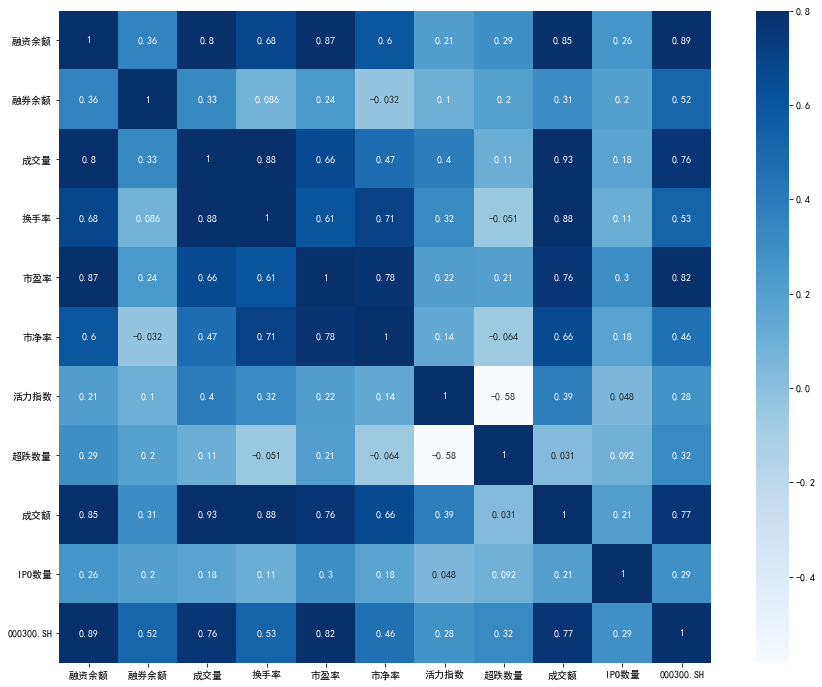

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (16,12))
sns.heatmap(corr,annot = True,vmax = 0.8,square = True,cmap = 'Blues')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

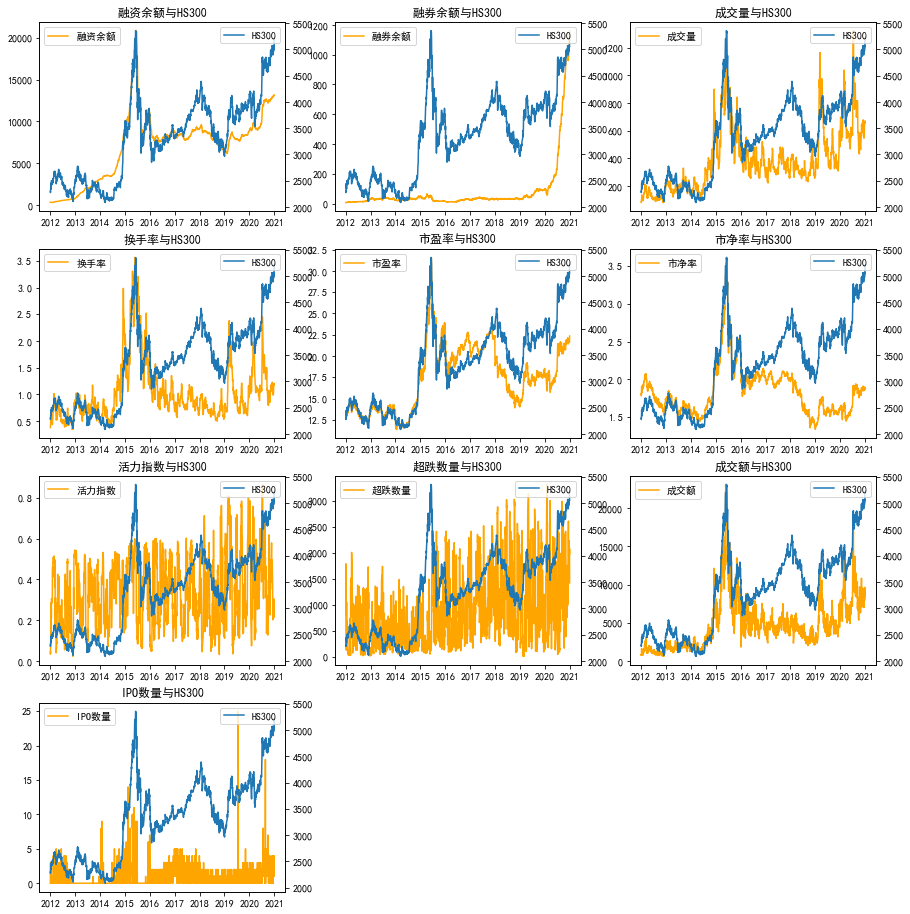

In [8]:
fig = plt.figure(figsize = (15,16))
for i in range(10):
    ax1 = fig.add_subplot(4,3,i+1)
    ax1.plot(Before_PCA.iloc[:,i],label = Before_PCA.columns[i],color = 'orange')
    plt.legend(loc = 'upper left')
    ax2 = ax1.twinx()
    ax2.plot(Before_PCA.iloc[:,10],label = 'HS300')
    plt.legend(loc = 'upper right')
    plt.title(Before_PCA.columns[i] + '与HS300')

plt.show()